In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

593

In [7]:
import requests

# Import the API key
from config import weather_api_key

In [8]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module for the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning of the logging")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i>=50):
        set_count += 1 
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON file and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standart
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning of the logging
------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | tombouctou
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 1 | porto walter
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | kamenka
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | mathathane
Processing Record 15 of Set 1 | porto empedocle
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | atu

Processing Record 33 of Set 4 | sibolga
Processing Record 34 of Set 4 | marystown
Processing Record 35 of Set 4 | ridgecrest
Processing Record 36 of Set 4 | abu samrah
Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | mergui
City not found. Skipping...
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | borba
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | verkhoyansk
Processing Record 47 of Set 4 | tianpeng
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | lorengau
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | westport
Processing Record 2 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 3 of Set 5 | daxian
City not found. Skipping...
Processing

Processing Record 22 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 23 of Set 8 | karratha
Processing Record 24 of Set 8 | richards bay
Processing Record 25 of Set 8 | tromso
Processing Record 26 of Set 8 | ballina
Processing Record 27 of Set 8 | hibbing
Processing Record 28 of Set 8 | tahta
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | miraflores
Processing Record 31 of Set 8 | beyneu
Processing Record 32 of Set 8 | yumen
Processing Record 33 of Set 8 | hokitika
Processing Record 34 of Set 8 | shepsi
Processing Record 35 of Set 8 | longyearbyen
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | rudolfov
Processing Record 38 of Set 8 | solntsevo
Processing Record 39 of Set 8 | cukai
Processing Record 40 of Set 8 | egvekinot
Processing Record 41 of Set 8 | purpe
Processing Record 42 of Set 8 | baranoa
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | colwyn bay
Processing Record 45 of

Processing Record 10 of Set 12 | lodja
Processing Record 11 of Set 12 | sisimiut
Processing Record 12 of Set 12 | lashio
Processing Record 13 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 14 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 12 | port macquarie
Processing Record 16 of Set 12 | mosquera
Processing Record 17 of Set 12 | kupang
Processing Record 18 of Set 12 | mezen
Processing Record 19 of Set 12 | atikokan
Processing Record 20 of Set 12 | belyy yar
Processing Record 21 of Set 12 | minot
Processing Record 22 of Set 12 | mogadishu
Processing Record 23 of Set 12 | cabedelo
Processing Record 24 of Set 12 | matara
Processing Record 25 of Set 12 | singaraja
Processing Record 26 of Set 12 | khategaon
Processing Record 27 of Set 12 | krasnoborsk
Processing Record 28 of Set 12 | polyarnyy
Processing Record 29 of Set 12 | gundlupet
Processing Record 30 of Set 12 | zonguldak
Processing Record 31 of Set 12 | port lincoln
Processing

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.92,82,20,3.00,US,2021-12-09 21:45:25
1,Tombouctou,20.0000,-3.0000,69.35,14,100,11.05,ML,2021-12-09 21:45:26
2,Kavieng,-2.5744,150.7967,83.25,81,67,17.27,PG,2021-12-09 21:45:26
3,Porto Walter,-8.2686,-72.7439,82.89,69,100,3.13,BR,2021-12-09 21:45:27
4,Airai,-8.9266,125.4092,62.65,85,92,1.07,TL,2021-12-09 21:45:27
5,Thompson,55.7435,-97.8558,1.56,78,90,9.22,CA,2021-12-09 21:45:27
6,Nikolskoye,59.7035,30.7861,0.01,99,85,4.12,RU,2021-12-09 21:45:28
7,Kamenka,51.3223,42.7678,31.75,87,100,7.49,RU,2021-12-09 21:44:09
8,Arraial Do Cabo,-22.9661,-42.0278,73.36,83,0,8.05,BR,2021-12-09 21:45:28
9,Mathathane,-22.2687,28.7495,76.62,50,67,4.63,BW,2021-12-09 21:45:29


In [12]:
# Reorder the columns
city_data_df_new = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[city_data_df_new]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-12-09 21:45:25,22.0752,-159.3190,80.92,82,20,3.00
1,Tombouctou,ML,2021-12-09 21:45:26,20.0000,-3.0000,69.35,14,100,11.05
2,Kavieng,PG,2021-12-09 21:45:26,-2.5744,150.7967,83.25,81,67,17.27
3,Porto Walter,BR,2021-12-09 21:45:27,-8.2686,-72.7439,82.89,69,100,3.13
4,Airai,TL,2021-12-09 21:45:27,-8.9266,125.4092,62.65,85,92,1.07
5,Thompson,CA,2021-12-09 21:45:27,55.7435,-97.8558,1.56,78,90,9.22
6,Nikolskoye,RU,2021-12-09 21:45:28,59.7035,30.7861,0.01,99,85,4.12
7,Kamenka,RU,2021-12-09 21:44:09,51.3223,42.7678,31.75,87,100,7.49
8,Arraial Do Cabo,BR,2021-12-09 21:45:28,-22.9661,-42.0278,73.36,83,0,8.05
9,Mathathane,BW,2021-12-09 21:45:29,-22.2687,28.7495,76.62,50,67,4.63


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data_df into a CSV
city_data_df.to_csv(output_data_file, index_label="City ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df['Wind Speed']

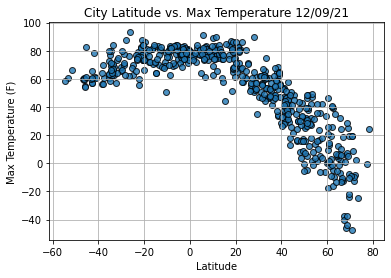

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temp,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

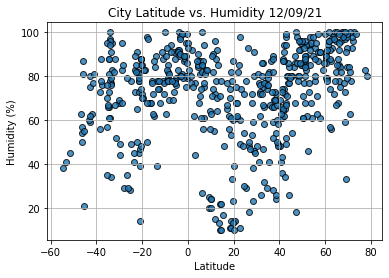

In [16]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

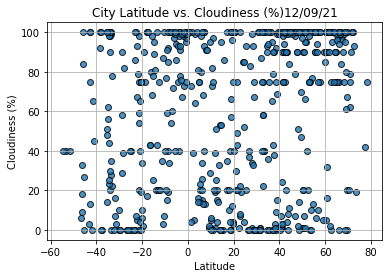

In [17]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

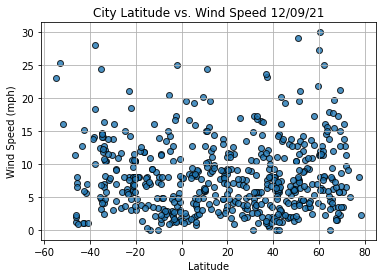

In [18]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values*slope + intercept
    # Get the equation of the line 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
nothern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

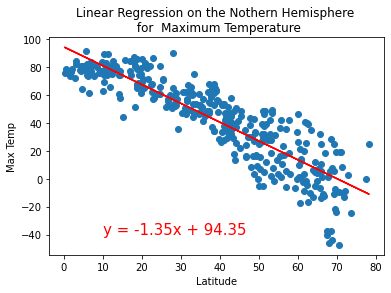

In [27]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for  Maximum Temperature', 'Max Temp', (10,-40))

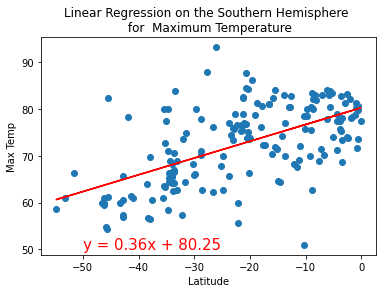

In [29]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for  Maximum Temperature', 'Max Temp', (-50,50))

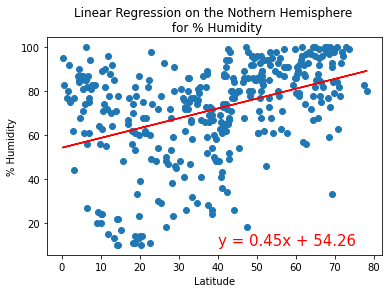

In [30]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for % Humidity', '% Humidity', (40,10))

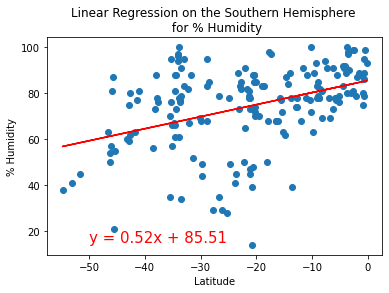

In [33]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))

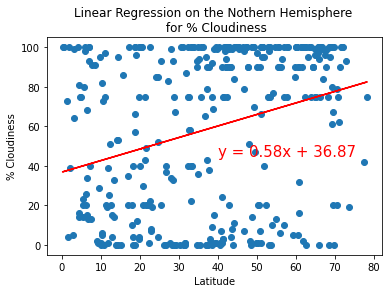

In [36]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,45))

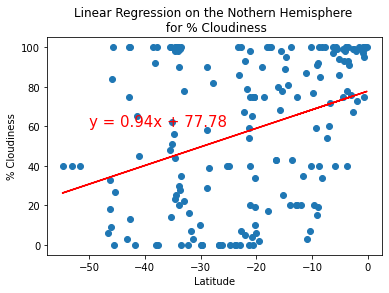

In [37]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

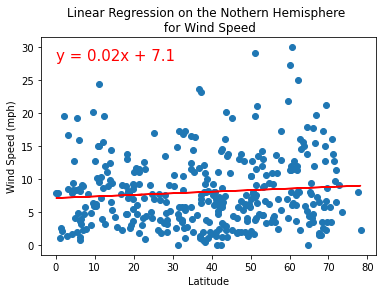

In [41]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (0,28))

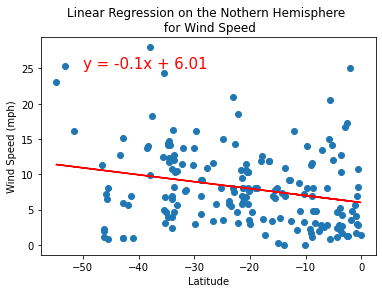

In [43]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-50,25))